## Importing libraries

In [184]:
#importing python modules
import numpy as np 
import pandas as pd 
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [185]:
#interactive mode on
%matplotlib inline
plt.ion()

## Preprocessing training data

In [186]:
#importing training data
train_data = pd.read_csv(r'training set.csv')
train_data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,25.517190,-32.188190,-0.233911,1.917029,1.931167,-0.661603,44.536206,13.213350,-8.256003,inner race
1,29.652070,-41.833100,-0.237828,1.744435,1.760500,-0.462326,64.129144,16.842980,-7.402413,inner race
2,24.354130,-18.504010,-0.228954,1.595095,1.611378,0.372335,21.017737,15.113857,-7.037989,inner race
3,25.295930,-23.810580,-0.218408,1.887255,1.899773,-0.025509,34.248293,13.315238,-8.698288,inner race
4,39.316650,-42.977340,-0.229513,1.974699,1.987910,-0.048985,70.369037,19.777879,-8.661414,inner race
...,...,...,...,...,...,...,...,...,...,...
223,3.061889,-3.309210,-0.122534,0.880321,0.888772,-0.014491,-0.091672,3.445078,-7.253258,healthy
224,3.106706,-3.802094,-0.124205,0.876610,0.885330,-0.059310,0.032960,3.509095,-7.127959,healthy
225,3.355037,-3.503051,-0.117753,0.877939,0.885764,-0.035668,0.021619,3.787733,-7.522238,healthy
226,3.170155,-3.266238,-0.111784,0.859697,0.866898,0.001270,-0.069905,3.656894,-7.755088,healthy


In [187]:
#encoding type of faults
ord_enc = OrdinalEncoder()
train_data["fault_code"] = ord_enc.fit_transform(train_data[["fault"]])
train_data[["fault", "fault_code"]]

,fault,fault_code
0,inner race,1.0
1,inner race,1.0
2,inner race,1.0
3,inner race,1.0
4,inner race,1.0
...,...,...
223,healthy,0.0
224,healthy,0.0
225,healthy,0.0
226,healthy,0.0


In [188]:
#unique fault code
train_data['fault_code'].unique()

array([1., 2., 0.])

In [189]:
# How many data points are there for each defect type?
train_data[['fault_code', 'fault']].value_counts()

fault_code  fault     
0.0         healthy       98
1.0         inner race    65
2.0         outer race    65
dtype: int64

In [190]:
#Scaling
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(train_data.iloc[:,:-2]))
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.756761,-2.685647,-1.577520,1.778609,1.780429,-2.039496,2.340293,1.514253,-1.008685
1,2.214681,-3.810035,-1.673009,1.376306,1.382857,-1.585828,3.658109,2.393688,-0.393490
2,1.627957,-1.090367,-1.456696,1.028209,1.035473,0.314337,0.758446,1.974733,-0.130844
3,1.732258,-1.708998,-1.199601,1.709210,1.707296,-0.591384,1.648330,1.538940,-1.327447
4,3.284992,-3.943429,-1.470326,1.913034,1.912613,-0.644828,4.077803,3.104793,-1.300871


In [191]:
#replacing column names
scaled_df.columns = train_data.drop(['fault', 'fault_code'],1).columns

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\3865731769.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  scaled_df.columns = train_data.drop(['fault', 'fault_code'],1).columns


In [192]:
# concatenating scaled data and fault and fault code
scaled_train_data  = pd.concat([scaled_df, train_data[['fault', 'fault_code']]], 1)
scaled_train_data

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\3188268998.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  scaled_train_data  = pd.concat([scaled_df, train_data[['fault', 'fault_code']]], 1)


,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_code
0,1.756761,-2.685647,-1.577520,1.778609,1.780429,-2.039496,2.340293,1.514253,-1.008685,inner race,1.0
1,2.214681,-3.810035,-1.673009,1.376306,1.382857,-1.585828,3.658109,2.393688,-0.393490,inner race,1.0
2,1.627957,-1.090367,-1.456696,1.028209,1.035473,0.314337,0.758446,1.974733,-0.130844,inner race,1.0
3,1.732258,-1.708998,-1.199601,1.709210,1.707296,-0.591384,1.648330,1.538940,-1.327447,inner race,1.0
4,3.284992,-3.943429,-1.470326,1.913034,1.912613,-0.644828,4.077803,3.104793,-1.300871,inner race,1.0
...,...,...,...,...,...,...,...,...,...,...,...
223,-0.730068,0.681019,1.137520,-0.637873,-0.647851,-0.566299,-0.661368,-0.852532,-0.285991,healthy,0.0
224,-0.725104,0.623559,1.096785,-0.646523,-0.655870,-0.668334,-0.652985,-0.837021,-0.195686,healthy,0.0
225,-0.697603,0.658421,1.254079,-0.643427,-0.654859,-0.614511,-0.653748,-0.769509,-0.479849,healthy,0.0
226,-0.718078,0.686029,1.399567,-0.685947,-0.698806,-0.530418,-0.659904,-0.801211,-0.647668,healthy,0.0


## Exploratory data analysis

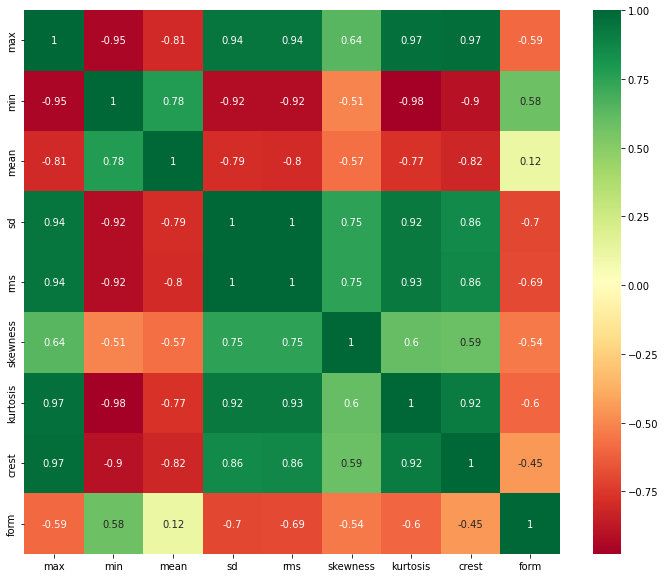

In [193]:
#corelation matrix
rcParams['figure.figsize'] = 12, 10
sns.heatmap(scaled_train_data.iloc[:,:-2].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\2833678532.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.pairplot(scaled_train_data.drop('fault_code',1),hue='fault',palette='Dark2')


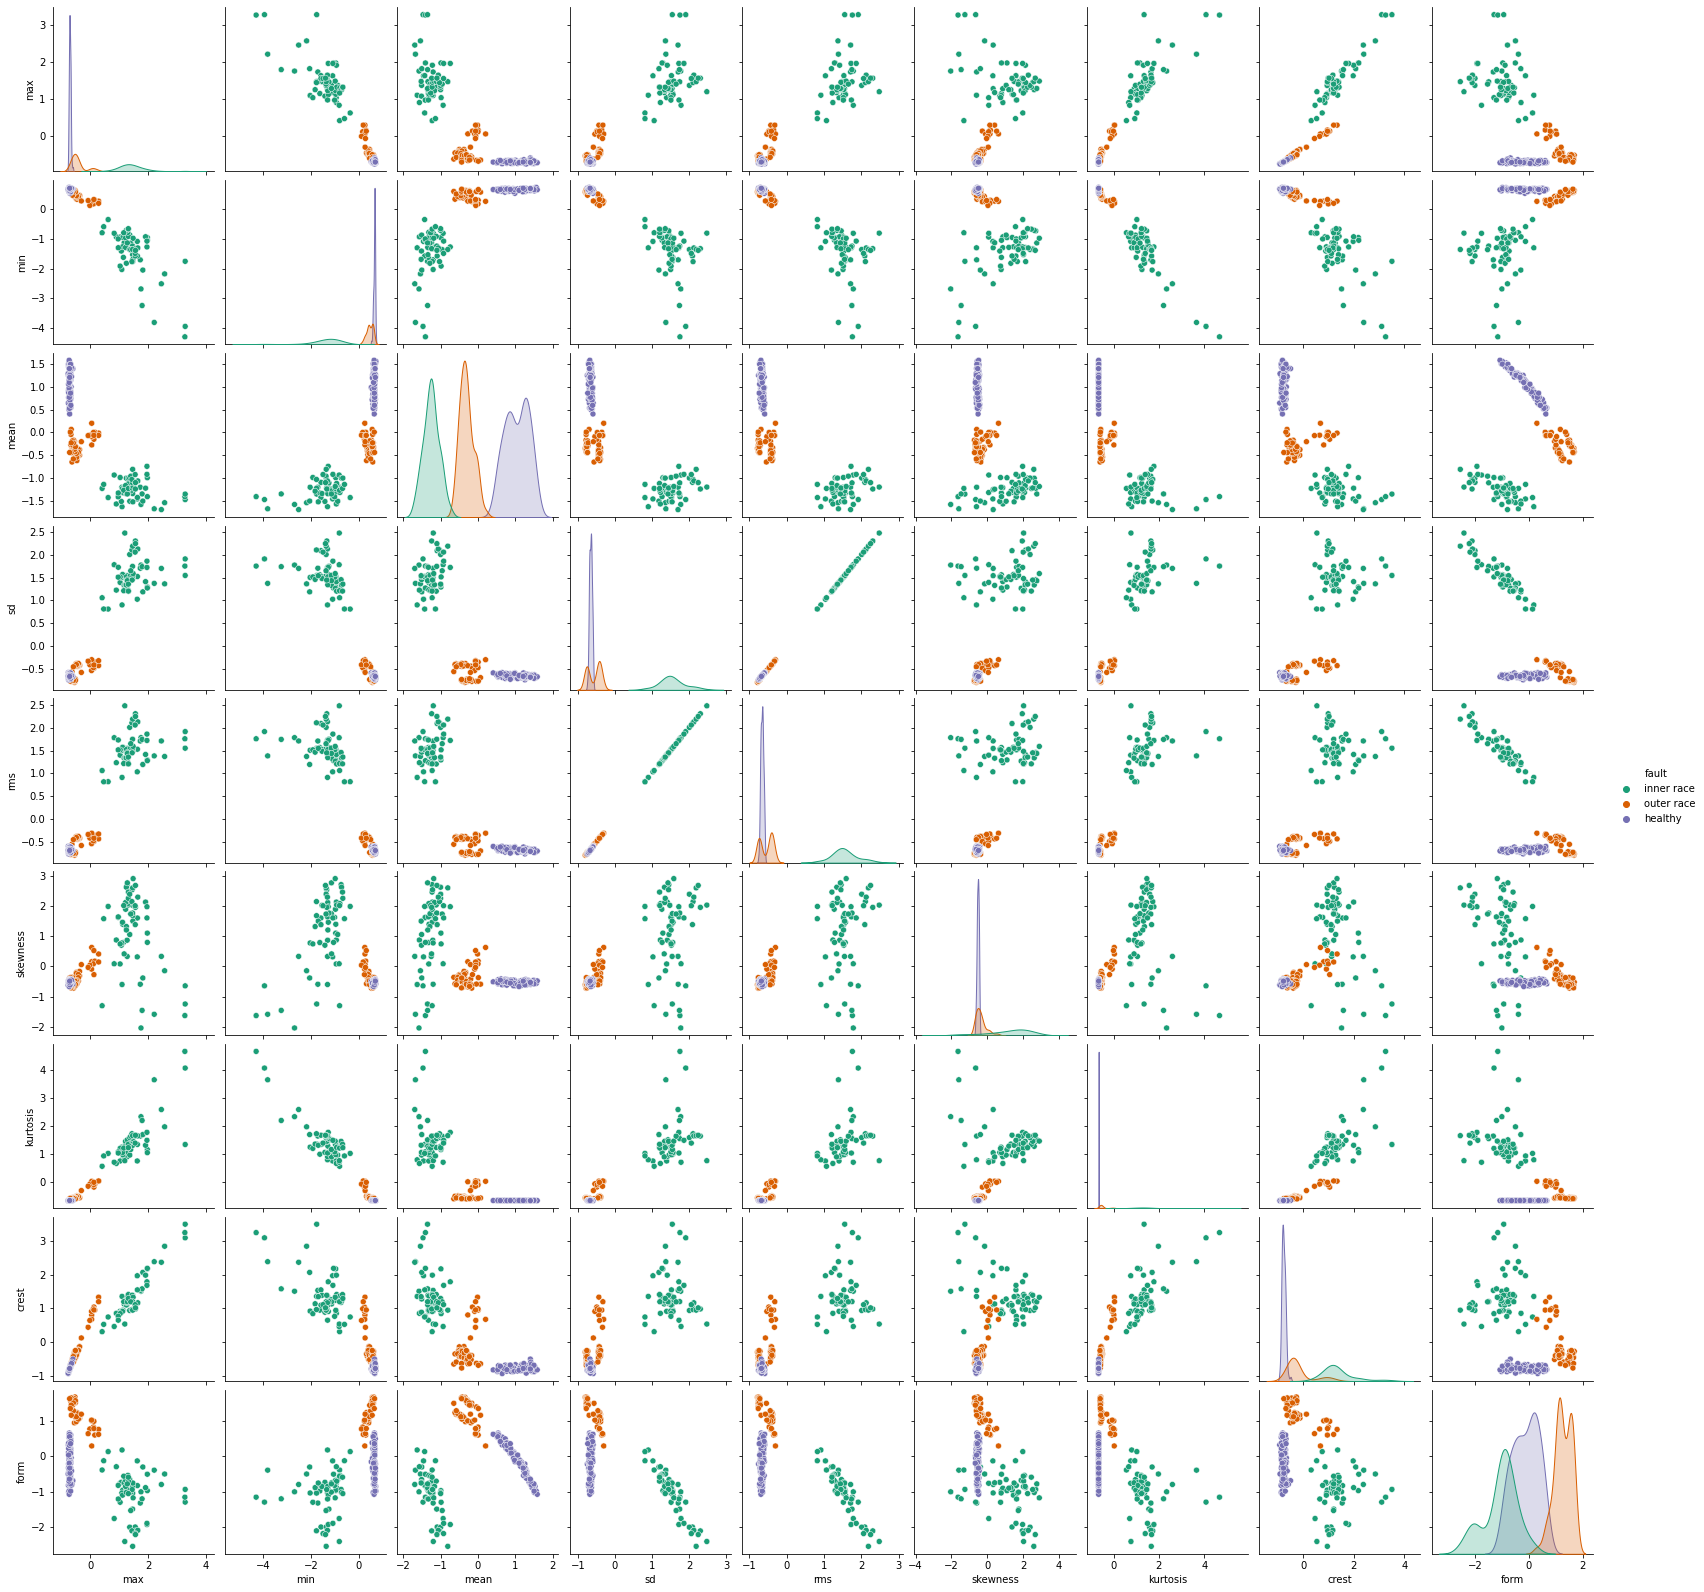

In [194]:
#pairplot
rcParams['figure.figsize'] = 6, 5
sns.pairplot(scaled_train_data.drop('fault_code',1),hue='fault',palette='Dark2')
plt.show()

## Preprocessing test data

In [195]:
#importing test data
test_data = pd.read_csv(r'testing set.csv')
test_data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,26.693390,-26.885610,-0.206590,2.015669,2.026145,0.394143,37.476395,13.174471,-9.807587,inner race
1,25.506160,-24.866240,-0.209803,2.219424,2.229226,0.870361,32.978273,11.441710,-10.625351,inner race
2,27.063930,-26.114660,-0.200304,1.970382,1.980456,0.877496,38.740663,13.665506,-9.887257,inner race
3,25.577340,-25.820530,-0.205683,2.143681,2.153437,0.524767,34.296381,11.877449,-10.469704,inner race
4,24.430500,-23.566130,-0.192673,2.091944,2.100711,0.897539,32.794856,11.629633,-10.902994,inner race
...,...,...,...,...,...,...,...,...,...,...
96,3.375329,-3.493280,-0.059576,0.878583,0.880564,0.001451,-0.019060,3.833145,-14.780480,healthy
97,3.663777,-3.374701,-0.051800,0.889948,0.891454,0.003606,0.050520,4.109887,-17.209525,healthy
98,3.422805,-3.386441,-0.056266,0.867496,0.869283,0.012464,0.066155,3.937505,-15.449626,healthy
99,3.965835,-3.224497,-0.062983,0.894686,0.896863,0.057361,0.118179,4.421896,-14.239866,healthy


In [196]:
#no. of defects in test data
test_data['fault'].value_counts()

healthy       49
inner race    26
outer race    26
Name: fault, dtype: int64

In [197]:
#encoding test data
test_data["fault_code"] = ord_enc.transform(test_data[["fault"]])

In [198]:
#scaling test data
scaled_df = pd.DataFrame(scaler.transform(test_data.iloc[:,:-2]))
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.887020,-2.067481,-0.911509,2.008533,2.001682,0.363983,1.865451,1.504833,-2.126936
1,1.755540,-1.832066,-0.989833,2.483468,2.474763,1.448129,1.562909,1.084997,-2.716311
2,1.928056,-1.977604,-0.758281,1.902972,1.895248,1.464372,1.950486,1.623807,-2.184356
3,1.763422,-1.943315,-0.889402,2.306918,2.298211,0.661359,1.651564,1.190574,-2.604134
4,1.636415,-1.680501,-0.572260,2.186322,2.175385,1.510000,1.550572,1.130529,-2.916413


In [199]:
#replacing column names
scaled_df.columns = test_data.drop(['fault', 'fault_code'],1).columns

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\4255187870.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  scaled_df.columns = test_data.drop(['fault', 'fault_code'],1).columns


In [200]:
# concatenating scaled data and fault and fault code
scaled_test_data  = pd.concat([scaled_df, test_data[['fault', 'fault_code']]], 1)
scaled_test_data

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\944491799.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  scaled_test_data  = pd.concat([scaled_df, test_data[['fault', 'fault_code']]], 1)


,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault,fault_code
0,1.887020,-2.067481,-0.911509,2.008533,2.001682,0.363983,1.865451,1.504833,-2.126936,inner race,1.0
1,1.755540,-1.832066,-0.989833,2.483468,2.474763,1.448129,1.562909,1.084997,-2.716311,inner race,1.0
2,1.928056,-1.977604,-0.758281,1.902972,1.895248,1.464372,1.950486,1.623807,-2.184356,inner race,1.0
3,1.763422,-1.943315,-0.889402,2.306918,2.298211,0.661359,1.651564,1.190574,-2.604134,inner race,1.0
4,1.636415,-1.680501,-0.572260,2.186322,2.175385,1.510000,1.550572,1.130529,-2.916413,inner race,1.0
...,...,...,...,...,...,...,...,...,...,...,...
96,-0.695355,0.659560,2.672257,-0.641925,-0.666972,-0.530007,-0.656484,-0.758506,-5.710977,healthy,0.0
97,-0.663411,0.673384,2.861815,-0.615434,-0.641602,-0.525100,-0.651804,-0.691454,-7.461627,healthy,0.0
98,-0.690098,0.672016,2.752958,-0.667768,-0.693252,-0.504935,-0.650753,-0.733221,-6.193241,healthy,0.0
99,-0.629959,0.690895,2.589218,-0.604390,-0.629003,-0.402723,-0.647253,-0.615856,-5.321348,healthy,0.0


## Spilting data into features and labels

In [201]:
#X_train
X_train = scaled_train_data.drop(['sd', 'skewness','fault','fault_code'],1)
X_train.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\352947706.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = scaled_train_data.drop(['sd', 'skewness','fault','fault_code'],1)


,max,min,mean,rms,kurtosis,crest,form
0,1.756761,-2.685647,-1.577520,1.780429,2.340293,1.514253,-1.008685
1,2.214681,-3.810035,-1.673009,1.382857,3.658109,2.393688,-0.393490
2,1.627957,-1.090367,-1.456696,1.035473,0.758446,1.974733,-0.130844
3,1.732258,-1.708998,-1.199601,1.707296,1.648330,1.538940,-1.327447
4,3.284992,-3.943429,-1.470326,1.912613,4.077803,3.104793,-1.300871


In [202]:
#y_train
y_train = scaled_train_data['fault_code']
y_train.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fault_code, dtype: float64

In [203]:
#X_test
X_test = scaled_test_data.drop(['sd','skewness','fault','fault_code'],1)
X_test.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_12148\3240431366.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = scaled_test_data.drop(['sd','skewness','fault','fault_code'],1)


,max,min,mean,rms,kurtosis,crest,form
0,1.887020,-2.067481,-0.911509,2.001682,1.865451,1.504833,-2.126936
1,1.755540,-1.832066,-0.989833,2.474763,1.562909,1.084997,-2.716311
2,1.928056,-1.977604,-0.758281,1.895248,1.950486,1.623807,-2.184356
3,1.763422,-1.943315,-0.889402,2.298211,1.651564,1.190574,-2.604134
4,1.636415,-1.680501,-0.572260,2.175385,1.550572,1.130529,-2.916413


In [204]:
#y_test
y_test = scaled_test_data['fault_code']
y_test.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fault_code, dtype: float64

## Decision Tree Classifier

In [205]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [206]:
#predictions
dt_predictions = dt_clf.predict(X_test)
print(dt_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [207]:
#Train Score Vs Test Score
print('Train Score:',dt_clf.score(X_train, y_train), 'Test Score:',dt_clf.score(X_test, y_test))

Train Score: 1.0 Test Score: 0.8712871287128713


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


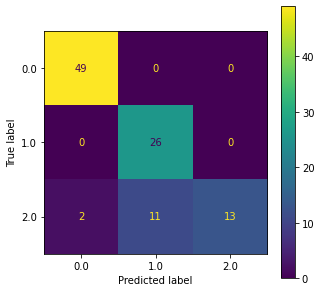

In [208]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(5,5))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_clf, X_test, y_test, ax=ax)

In [209]:
# Performance metrics
from sklearn.metrics import classification_report
labels= ['outer race', 'inner race', 'healthy']
print(classification_report(y_test, dt_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       0.96      1.00      0.98        49
  inner race       0.70      1.00      0.83        26
     healthy       1.00      0.50      0.67        26

    accuracy                           0.87       101
   macro avg       0.89      0.83      0.82       101
weighted avg       0.90      0.87      0.86       101



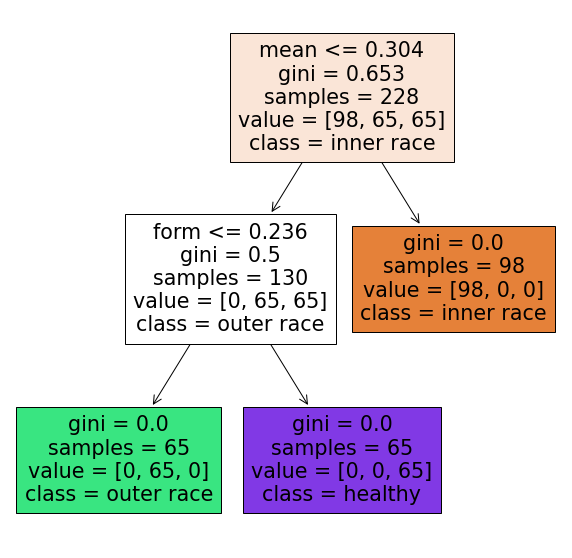

In [259]:
#Plotting Tree
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt_clf,
                   feature_names=X_train.columns,
                   class_names=['inner race', 'outer race', 'healthy'],
                   filled=True)

In [211]:
# Create the parameter grid based on the results of random search 
params = {
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_depth':[1, 2,4,6,8],
    'min_samples_split': [2, 3, 4]    
}

In [212]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV

dt_best_clf = GridSearchCV(estimator=dt_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_best_clf.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [213]:
#best estimator
dt_best_clf.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [214]:
#predictions
dt_best_predictions = dt_best_clf.predict(X_test)
print(dt_best_predictions)

[1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [215]:
#Train Score Vs Test Score
print('Train Score:',dt_best_clf.score(X_train, y_train), 'Test Score:',dt_best_clf.score(X_test, y_test))

Train Score: 1.0 Test Score: 0.8613861386138614


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


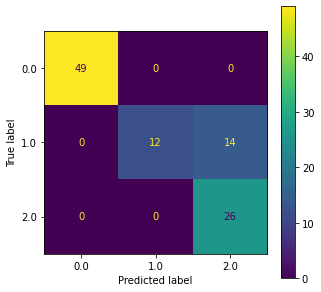

In [216]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(dt_best_clf, X_test, y_test, ax=ax)

In [217]:
# Performance metrics
print(classification_report(y_test, dt_best_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       1.00      1.00      1.00        49
  inner race       1.00      0.46      0.63        26
     healthy       0.65      1.00      0.79        26

    accuracy                           0.86       101
   macro avg       0.88      0.82      0.81       101
weighted avg       0.91      0.86      0.85       101



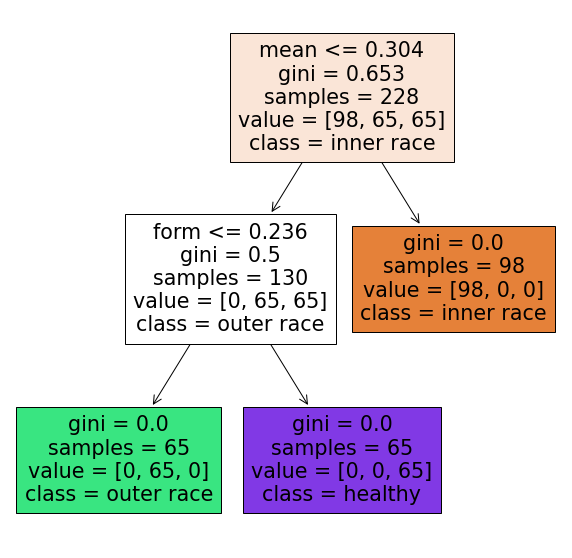

In [260]:
#Plotting tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(DecisionTreeClassifier(max_depth=2, min_samples_split=3).fit(X_train, y_train),
                   feature_names=X_train.columns,
                   class_names=['inner race', 'outer race', 'healthy'],
                   filled=True)

## Random Forest Classifier

In [219]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [220]:
#Fitting training set
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [221]:
rf_predictions = rf_clf.predict(X_test)

In [222]:
#Train score Vs Test score
print('Train score:',rf_clf.score(X_train, y_train), 'Test Score:',rf_clf.score(X_test, y_test))

Train score: 1.0 Test Score: 0.8712871287128713


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


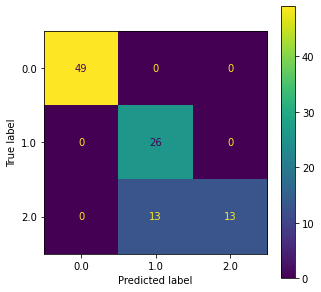

In [223]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax)

In [224]:
#Performance metrics
print(classification_report(y_test, rf_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       1.00      1.00      1.00        49
  inner race       0.67      1.00      0.80        26
     healthy       1.00      0.50      0.67        26

    accuracy                           0.87       101
   macro avg       0.89      0.83      0.82       101
weighted avg       0.91      0.87      0.86       101



In [225]:
#Performance grid
n_estimators = [1, 5, 10, 20, 100, 120] 
max_depth = [1, 2, 3] 
min_samples_split = [2, 3, 4, 6, 8] 
min_samples_leaf = [ 1, 2, 3] 

random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,}

In [226]:
#using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_best_clf = RandomizedSearchCV(estimator = rf_clf,param_distributions = random_grid,
               n_iter = 500, cv = 10, verbose=5, n_jobs = -1)

In [227]:
#fitting train set
rf_best_clf.fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 270 is smaller than n_iter=500. Running 270 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 6, 8],
                                        'n_estimators': [1, 5, 10, 20, 100,
                                                         120]},
                   verbose=5)

In [228]:
#print Random grid
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_best_clf.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 5, 10, 20, 100, 120], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 3, 4, 6, 8], 'min_samples_leaf': [1, 2, 3]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 1}  



In [229]:
rf_best_predictions = dt_best_clf.predict(X_test)
print(rf_best_predictions)

[1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [230]:
#Train score Vs test score
print('Train score:',rf_best_clf.score(X_train, y_train), 'Test score:',dt_best_clf.score(X_test, y_test))

Train score: 0.9912280701754386 Test score: 0.8613861386138614


In [231]:
#Confusion Matrix
plot_confusion_matrix(dt_best_clf, X_test, y_test, ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [232]:
#Performance matrix
print(classification_report(y_test, rf_best_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       1.00      1.00      1.00        49
  inner race       1.00      0.46      0.63        26
     healthy       0.65      1.00      0.79        26

    accuracy                           0.86       101
   macro avg       0.88      0.82      0.81       101
weighted avg       0.91      0.86      0.85       101



## KNN Classifier

In [233]:
#importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [234]:
#fitting training set
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [235]:
#predictions
knn_predictions = knn_clf.predict(X_test)
print(knn_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [236]:
#Train score vs test score
print('Train score:',knn_clf.score(X_train, y_train), 'Test score:',knn_clf.score(X_test, y_test))

Train score: 1.0 Test score: 0.8514851485148515


In [237]:
#Confusion Matrix
plot_confusion_matrix(knn_clf, X_test, y_test, ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [238]:
#Performance metrics
print(classification_report(y_test, knn_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       0.96      1.00      0.98        49
  inner race       0.67      1.00      0.80        26
     healthy       1.00      0.42      0.59        26

    accuracy                           0.85       101
   macro avg       0.88      0.81      0.79       101
weighted avg       0.90      0.85      0.83       101



In [239]:
#List Hyperparameters that we want to tune.
leaf_size = [1, 2, 3, 4, 5]
n_neighbors = [1, 2, 3, 4, 5]
p=[1, 2, 3]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [240]:
#Use GridSearch
knn_best_clf = GridSearchCV(knn_clf, hyperparameters, cv=10)
knn_best_clf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2, 3]})

In [241]:
#Print The value of best Hyperparameters
print('Best leaf_size:', knn_best_clf.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_best_clf.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_best_clf.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [242]:
#predictions
knn_best_predictions = knn_best_clf.predict(X_test)
print(knn_best_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [243]:
#Train score Vs Test score
print('Train score:',knn_best_clf.score(X_train, y_train), 'Test score:',knn_best_clf.score(X_test, y_test))

Train score: 1.0 Test score: 0.8613861386138614


In [244]:
#Confusion Matrix
plot_confusion_matrix(knn_best_clf, X_test, y_test, ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [245]:
#Performance Metrics
print(classification_report(y_test, knn_best_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       0.98      1.00      0.99        49
  inner race       0.67      1.00      0.80        26
     healthy       1.00      0.46      0.63        26

    accuracy                           0.86       101
   macro avg       0.88      0.82      0.81       101
weighted avg       0.90      0.86      0.85       101



## SVM Classifier

In [246]:
#importing SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)

SVC()

In [247]:
#predictions
svm_predictions = svm_clf.predict(X_test)
print(svm_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [248]:
#train score vs test score
print('Train score:',svm_clf.score(X_train, y_train), 'Test score:',svm_clf.score(X_test, y_test))

Train score: 1.0 Test score: 0.36633663366336633


In [249]:
#Confusion Matrix
plot_confusion_matrix(svm_clf, X_test, y_test, ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [250]:
#Performance Metrics
print(classification_report(y_test, svm_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       0.00      0.00      0.00        49
  inner race       0.30      1.00      0.46        26
     healthy       1.00      0.42      0.59        26

    accuracy                           0.37       101
   macro avg       0.43      0.47      0.35       101
weighted avg       0.33      0.37      0.27       101



In [251]:
#Hyperparameter tuning
param_grid = {'C': [0.02,0.021,0.022],
              'gamma': [0.8,0.7,0.6, 0.65],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=10)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.739 total time=   0.0s
[CV 3/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.957 total time=   0.0s
[CV 7/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.957 total time=   0.0s
[CV 9/10] END ....C=0.02, gamma=0.8, kernel=rbf;, score=0.591 total time=   0.0s
[CV 10/10] END ...C=0.02, gamma=0.8, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/10] END ....C=0.02, gamma=0.7, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/10] END ....C=0.02, gamma=0.7, kernel=rb

[CV 4/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END ...C=0.022, gamma=0.6, kernel=rbf;, score=0.818 total time=   0.0s
[CV 10/10] END ..C=0.022, gamma=0.6, kernel=rbf;, score=0.909 total time=   0.0s
[CV 1/10] END ..C=0.022, gamma=0.65, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/10] END ..C=0.022, gamma=0.65, kernel=rbf;, score=0.870 total time=   0.0s
[CV 3/10] END ..C=0.022, gamma=0.65, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END ..C=0.022, gamma=0.65, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ..C=0.022, gamma=0.65, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ..C=0.022, gam

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.02, 0.021, 0.022],
                         'gamma': [0.8, 0.7, 0.6, 0.65], 'kernel': ['rbf']},
             verbose=3)

In [252]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.022, 'gamma': 0.6, 'kernel': 'rbf'}
SVC(C=0.022, gamma=0.6)


In [253]:
#Best SVM Classifier
best_svm_clf = SVC(kernel = 'rbf', C=0.021, gamma=0.6).fit(X_train, y_train)

In [254]:
#Best predictions
best_svm_predictions = best_svm_clf.predict(X_test)
print(best_svm_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [255]:
#Train score Vs Test score
print('Train score:',best_svm_clf.score(X_train, y_train), 'Test score:',best_svm_clf.score(X_test, y_test))

Train score: 1.0 Test score: 0.8514851485148515


In [256]:
#Confusion Matrix
plot_confusion_matrix(best_svm_clf, X_test, y_test, ax=ax)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [257]:
#Performance metrics
print(classification_report(y_test, best_svm_predictions, target_names=labels))

              precision    recall  f1-score   support

  outer race       0.96      1.00      0.98        49
  inner race       0.67      1.00      0.80        26
     healthy       1.00      0.42      0.59        26

    accuracy                           0.85       101
   macro avg       0.88      0.81      0.79       101
weighted avg       0.90      0.85      0.83       101



In [258]:
#opening pickle file and dumping decision tree classifier
import pickle
file = open('bearing_fault_detection_model.pkl', 'wb')
pickle.dump(dt_best_clf, file)